# Bees vs Wasps example notebook

#### fast.ai recomended init

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision.all import *
from fastai.metrics import error_rate

# additional classic imports
from pathlib import Path
import pandas as pd
import numpy as np
import random

#### Run parameters
Note that these are reduced to provide a quick overview
obviously you will get better results with larger batch size, larger image size, and full dataset rather than the reduced dataset.

In [2]:
bs = 64 # Batch size
resize_size = 96 # for training, resize all the images to a square of this size
training_subsample = 0.1 # for development, use a small fraction of the entire dataset rater than full dataset

Note that at this point you have to get the data somehow into your system. This notebook does not demonstrate that, and instead, assumes that the root folder of the dataset is already there

In [3]:
bees_vs_wasps_dataset_path=Path('../') # this is relative to the "example_notebook" folder. Modify this to reflect your setup
df_labels = pd.read_csv(bees_vs_wasps_dataset_path/'labels.csv')
df_labels=df_labels.set_index('id')
# perform dataset subsampling
df_labels = df_labels.sample(frac=training_subsample, axis=0)

In [4]:
df_labels

,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
id,,,,,,,,,
10923,other_noinsect\534519.jpg,0,0,0,1,0,0,0,other
3720,wasp1\23869025585_e6a17772e4_n.jpg,0,1,0,0,1,0,0,wasp
6933,wasp2\I00192.jpg,0,1,0,0,0,0,0,wasp
1295,bee1\3961827753_3292b2eafa_n.jpg,1,0,0,0,1,0,0,bee
8096,wasp2\W00481.jpg,0,1,0,0,0,0,0,wasp
...,...,...,...,...,...,...,...,...,...
563,bee1\2429031531_2890d08d53_n.jpg,1,0,0,0,1,1,0,bee
9715,other_insect\43626025550_5bc4d673c5_m.jpg,0,0,1,0,1,0,1,insect
7881,wasp2\W00266.jpg,0,1,0,0,0,0,0,wasp


In [5]:
ImageDataLoaders.from_df??

In [6]:
data = ImageDataLoaders.from_df(
    df = df_labels,
    path = Path('f:/kaggle/bee_vs-wasp/manual_curation_pass2/'),
    valid_pct=0.2,
    seed = 42,
    fn_col='path',
    folder=None,
    label_col='label',
    bs=bs,
    shuffle_train=True,
    batch_tfms=aug_transforms(),
    item_tfms=Resize(resize_size),device='cpu', num_workers=0,
)

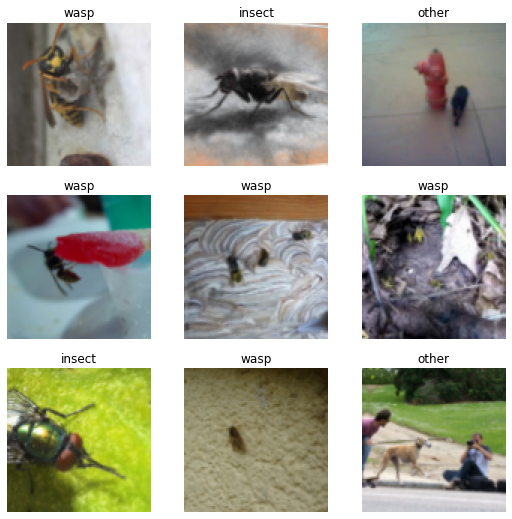

In [7]:
data.show_batch()

In [8]:
learn = cnn_learner(data, resnet18, metrics=error_rate)

In [9]:
 learn.lr_find?

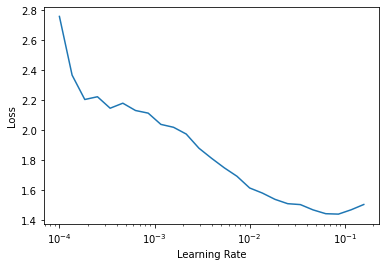

In [10]:
best_lr=learn.lr_find(start_lr=1e-04, end_lr=1, num_it=30) 

In [11]:
print(best_lr)

SuggestedLRs(lr_min=0.008576958626508712, lr_steep=0.002154434798285365)


In [12]:
learn.fine_tune?

In [13]:
learn.fine_tune(1,base_lr=best_lr[0])

epoch,train_loss,valid_loss,error_rate,time
0,1.535392,1.363510,0.232456,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.801801,1.475591,0.210526,00:13


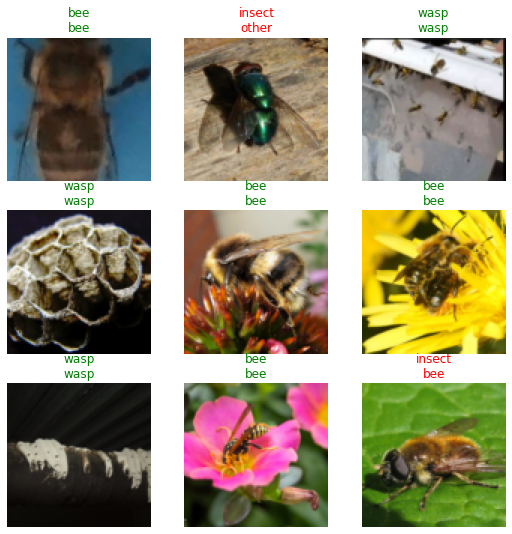

In [14]:
learn.show_results()

In [15]:
learn.save('stage-1')

Path('f:/kaggle/bee_vs-wasp/manual_curation_pass2/models/stage-1.pth')

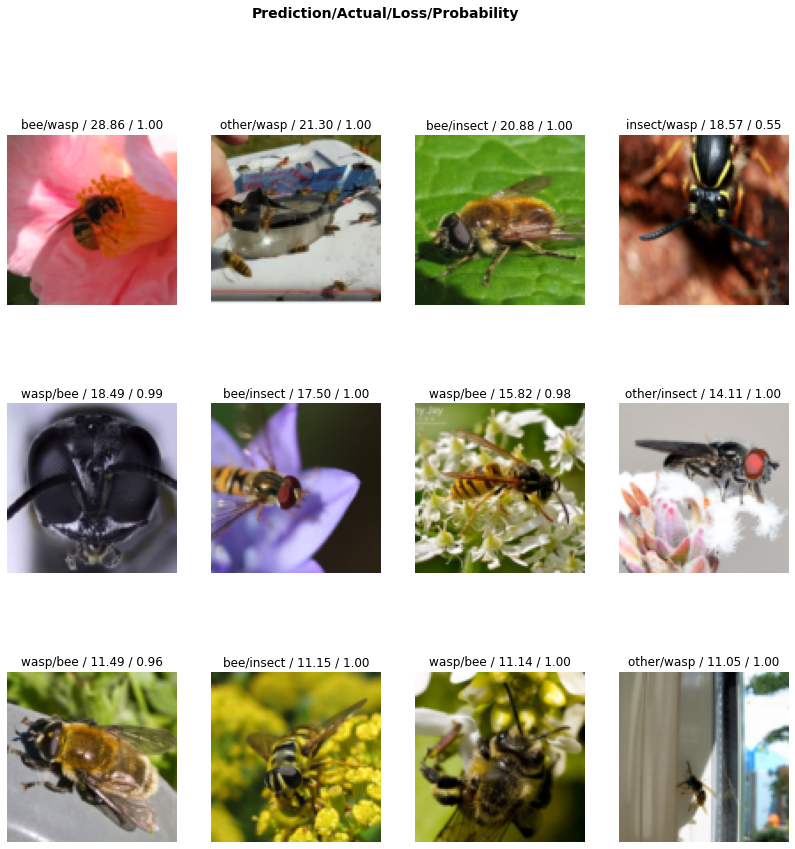

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_top_losses(12, figsize=(14,14))

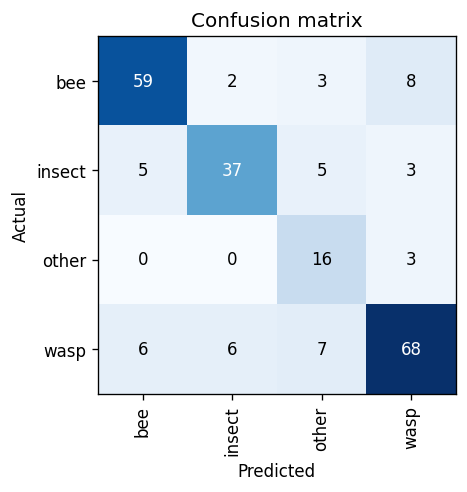

In [17]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)